In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# open parquet file

df = pd.read_parquet('christianity_kjv_verses.parquet', engine='pyarrow')
df.head()

,Book,Chapter,Verse,Text,Embedding
0,Genesis,1,1,In the beginning God created the heaven and th...,"[0.03170524910092354, -0.014898531138896942, -..."
1,Genesis,1,2,"And the earth was without form, and void; and ...","[-0.0021220308262854815, -0.03377591818571091,..."
2,Genesis,1,3,"And God said, Let there be light: and there wa...","[0.009015458635985851, -0.021705234423279762, ..."
3,Genesis,1,4,"And God saw the light, that [it was] good: and...","[0.025607015937566757, -0.014873013831675053, ..."
4,Genesis,1,5,"And God called the light Day, and the darkness...","[0.019355449825525284, -0.027212854474782944, ..."


(31102,)
[0.99999996 0.90150368 0.89229566 0.89187741 0.8917982  0.88794302
 0.88761605 0.88071082 0.87800063 0.87574158]
['In the beginning God created the heaven and the earth.'
 'The same was in the beginning with God.'
 'These [are] the generations of the heavens and of the earth when they were created, in the day that the LORD God made the earth and the heavens,'
 'And, Thou, Lord, in the beginning hast laid the foundation of the earth; and the heavens are the works of thine hands:'
 'And God called the firmament Heaven. And the evening and the morning were the second day.'
 "Behold, the heaven and the heaven of heavens [is] the LORD'S thy God, the earth [also], with all that therein [is]."
 'In the beginning was the Word, and the Word was with God, and the Word was God.'
 "The heaven, [even] the heavens, [are] the LORD'S: but the earth hath he given to the children of men."
 'Before the mountains were brought forth, or ever thou hadst formed the earth and the world, even from eve

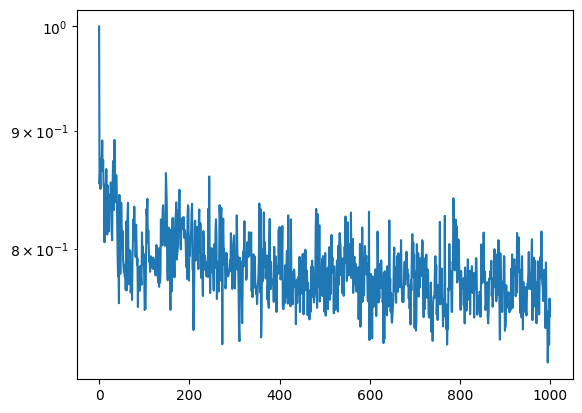

In [14]:
# convert to numpy array
arr = df['Embedding'].to_numpy()
# concatenate all embeddings into one array
# np.concatenate(df['Embedding'].to_numpy(), axis=0)
mat = np.stack(arr, axis=0 )
magnitude_arr = np.linalg.norm(mat, axis=1)
print(magnitude_arr.shape)
mat = mat / magnitude_arr[:, None]

k = 10

# vec -> 1D numpy array of shape D
# mat -> 2D numpy array of shape N x D
# k -> number of most similar entities to find.
vec = arr[0]
similarities = vec @ mat.T

# plot similarities  on log scale
similarities_truncated = similarities[similarities > 0][:1000]
plt.plot(similarities_truncated)
plt.yscale('log')

partitioned_indices = np.argpartition(-similarities, kth=k)[:k]
top_k_indices = partitioned_indices[np.argsort(-similarities[partitioned_indices])]

# print(top_k_indices)
print(similarities[top_k_indices])
print(df.iloc[top_k_indices]['Text'].values)


lowest_indices = np.argpartition(similarities, kth=k)[:k]
lowest_k_indices = lowest_indices[np.argsort(similarities[lowest_indices])]
# print(lowest_k_indices)
print(similarities[lowest_k_indices])
print(df.iloc[lowest_k_indices]['Text'].values)